# DiploDatos Kaggle Competition

Presentamos un código creado como ejemplo de base para la competición.

Deben:

- Explorar los datos y aprender de ellos.
- Probar diferentes modelos y ver cuáles ajustan mejor dado los datos.
- **Obtener una accuracy mejor que la que se presenta en este ejemplo.**  (77.74026146494946 en Baseline)
- Tratar de obtener la accuracy más alta posible!
- Discutir la elección de modelo.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

## Vision General

Inicialmente vamos a ver de forma general el dataset, sus variables y el tipo de dato de cada una.

In [6]:
df_train = pd.read_csv('train.csv') 
print(f"{df_train.info()}\n")
print(f"Shape df = {df_train.shape}\n")
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB
None

Shape df = (7823, 14)

       PassengerId          Age   RoomService     FoodCourt  ShoppingMall  \
count  7823.000000  7661.000000   7

In [7]:
df_test = pd.read_csv('test.csv')
print(f"{df_test.info()}\n")
print(f"Shape df = {df_test.shape}\n")
print(df_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870 entries, 0 to 869
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   870 non-null    int64  
 1   HomePlanet    848 non-null    object 
 2   CryoSleep     849 non-null    object 
 3   Cabin         855 non-null    object 
 4   Destination   848 non-null    object 
 5   Age           853 non-null    float64
 6   VIP           851 non-null    object 
 7   RoomService   843 non-null    float64
 8   FoodCourt     842 non-null    float64
 9   ShoppingMall  850 non-null    float64
 10  Spa           845 non-null    float64
 11  VRDeck        851 non-null    float64
 12  Name          854 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 88.5+ KB
None

Shape df = (870, 13)

       PassengerId         Age  RoomService     FoodCourt  ShoppingMall  \
count   870.000000  853.000000   843.000000    842.000000    850.000000   
mean   43

In [8]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


In [9]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


### Datos Faltantes

Observamso los datos faltantes tanto en el set de entenamiento como en el de test.

In [10]:
print('Datos faltantes Training Set:')
print(df_train.isna().sum())
print('')
print('Datos faltantes Test Set:')
print(df_test.isna().sum())

Datos faltantes Training Set:
PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

Datos faltantes Test Set:
PassengerId      0
HomePlanet      22
CryoSleep       21
Cabin           15
Destination     22
Age             17
VIP             19
RoomService     27
FoodCourt       28
ShoppingMall    20
Spa             25
VRDeck          19
Name            16
dtype: int64


Casi todas las variables tienen datos faltantes.

### Datos duplicados

In [6]:
print(f'Duplicados en el Training set: {df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train),1)}%)\n')
print(f'Duplicados en el Test set: {df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test),1)}%)')

Duplicados en el Training set: 0, (0.0%)

Duplicados en el Test set: 0, (0.0%)


### Cardinalidad de features

In [7]:
df_train.nunique()

PassengerId     7823
HomePlanet         3
CryoSleep          2
Cabin           6009
Destination        3
Age               80
VIP                2
RoomService     1195
FoodCourt       1400
ShoppingMall    1045
Spa             1238
VRDeck          1229
Name            7623
Transported        2
dtype: int64

In [8]:
df_test.nunique()

PassengerId     870
HomePlanet        3
CryoSleep         2
Cabin           822
Destination       3
Age              73
VIP               2
RoomService     238
FoodCourt       260
ShoppingMall    214
Spa             260
VRDeck          229
Name            854
dtype: int64

- 8693 filas(instancias) y 14 columnas(13 variables + 1 variable objetivo)
- Los tipos de datos presente son int64 float64 y object
- Hay variables que tienen mucha mucha informacion en una columna siendo las que presentan mayor cardinalidad.
- Hay variables que son booleanas aunque estan definidas como int64 dtype - Transported,CryoSleep,VIP
- Tanto el set de entrenamiento como el de test tienen datos faltantes
- La mayoria de las variables tienen datos faltantes
- La variable objetivo y de Id de pasajero no presentan datos faltantes

## Analisis Exploratorio

### Variables Continuas

**Age**

Text(0.5, 0, 'Edad[años]')

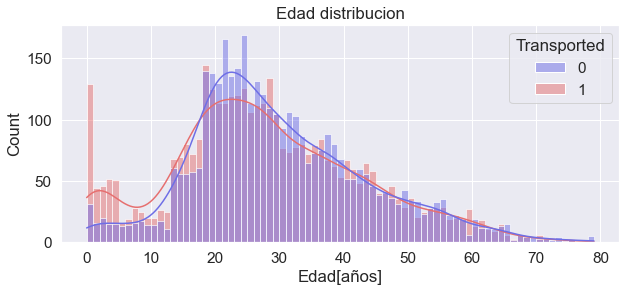

In [11]:
# Figure size
plt.figure(figsize=(10,4))

colors = sns.color_palette(palette='seismic', n_colors=2, desat=0.7)

# Histogram
sns.histplot(data=df_train, x='Age', hue='Transported', binwidth=1, kde=True, palette=colors)
plt.title('Edad distribucion')
plt.xlabel('Edad[años]')

Text(0, 0.5, 'Age (years)')

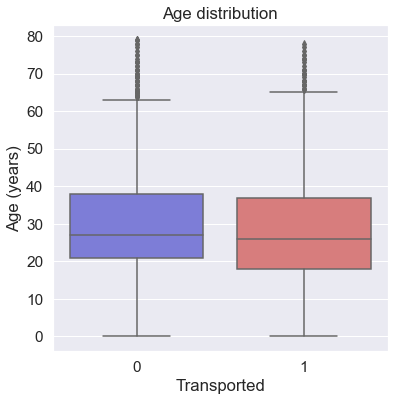

In [10]:
# Figure size
plt.figure(figsize=(6,6))
# Boxplot
sns.boxplot(x='Transported', y='Age', data=df_train, palette=colors)
plt.title('Age distribution')
plt.ylabel('Age (years)')

- Las personas de entre 0 a 18 años es mas probable que fueran transportadas a que no.
- Las personas de entre 18 a 30 años es menos probable que fueran transportadas a que no.
- Las personas mayores de 30 años tienen la misma probabilidad de ser transportados o no.
- Puede ser util discretizar la variable en grupos donde se considere si la persona es un niño, adolescente, adulto o anciano.
- Basado en la visualizacion, los pasajero mas jovenes tienen mayores chances de ser transportados, esto se refleja en el histograma y la mediana de los diagramas de cajas.

**Expenditure**

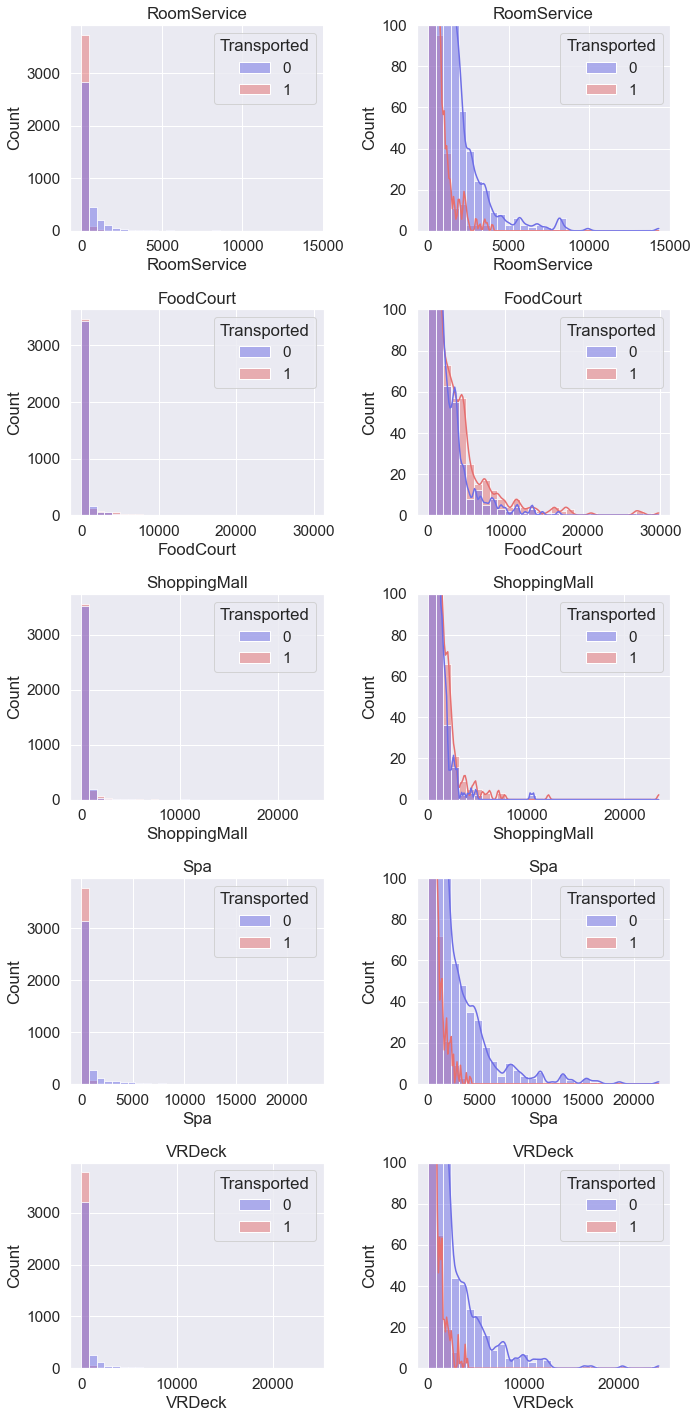

In [31]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df_train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported', palette=colors)
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df_train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported', palette=colors)
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()


- La mayoria de las personas casi no gastan plata como se ve en los graficos de la izquierda
- La distribucion del gasto decae exponencialmente como se ve en los graficos de la derecha.
- Hay un numero pequeño de outliers.
- La mayor cantidad de personas transportadas tiende a gastar menos.
- RoomService, Spa yVRDeck tienen distribuciones distintas a ShoppingMall y FoodCourt. Se puede pensar a las primeras como amenities de lujo frente a amenities esenciales.
- Quizas convenga crear una variable que contenga el gasto total que se realizo sobre todas las amenities (Expenditure). A su vez se podira crear una variable booleana que indique si la persona gasto o no gasto.
- Se podria tomar una transformacion logaritmica para reducir el sesgo y el efecto de los outliers en estas variables.

### Variables Categoricas

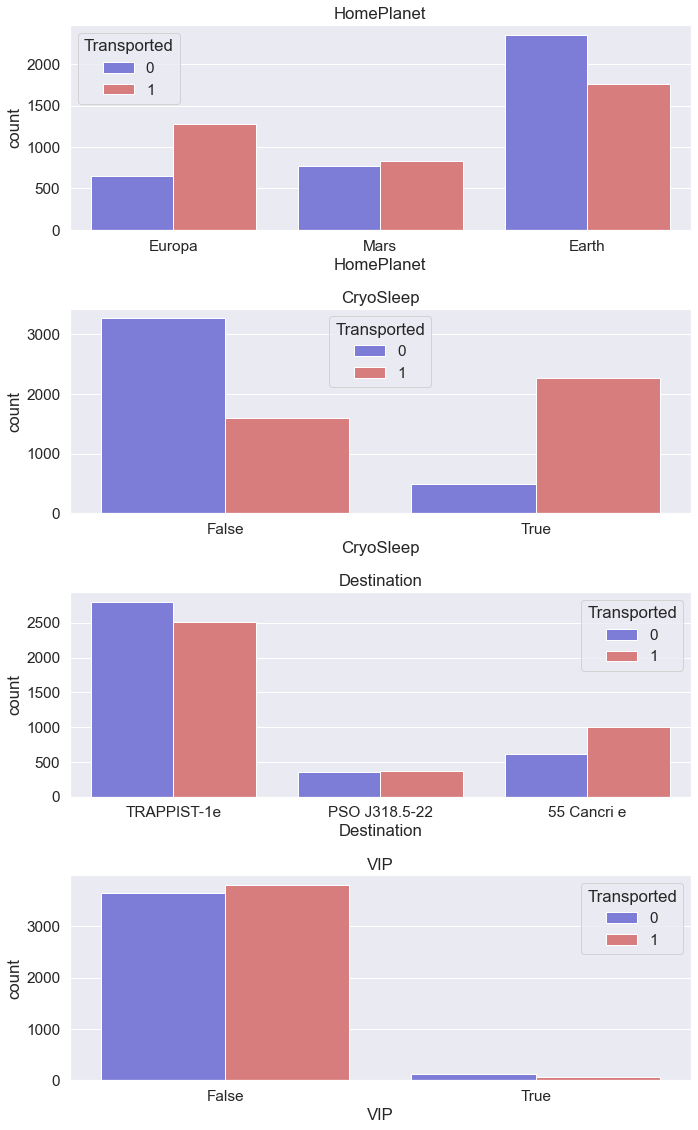

In [12]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=df_train, x=var_name, axes=ax, hue='Transported', palette=colors)
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

- Los pasajeros provenientes de Europa y Marte parecen tener una mayor probabilidad de ser transportados en relacion a los de la Tierra.
- La variable VIP no parece ser relevante ya que tanto para las personas VIP y las no VIP la distribucion de la variable objetivo es casi 50-50 para ambos casos. En contraste, CryoSleep parece ser mucho mas relevante.
- Basado en la visualizacion se puede inferir una correlacion positiva entre CryoSleep y Transported.
- Basado en la visualizacion el destino "TRAPPIST-1e", excibe una correlacion negativa con Transported.

### Otras variables categoricas

In [17]:
# Qualitative features
qual_feats=['PassengerId', 'Cabin' ,'Name']

# Preview qualitative features
df_train[qual_feats].head()

,PassengerId,Cabin,Name
0,3430,C/123/P,Azhah Tronsive
1,669,F/126/S,Roswal Sha
2,8430,B/343/S,Shaiam Tinganking
3,6463,F/1420/P,Landa Grifford
4,85,G/9/P,Gracy Dunnisey


- La cabina toma la forma de plataforma/numero/lado, donde lado es P para babo y S para estribor.
- Podemos extraer tres variables de la variable Cabin, estas son CabinDeck, CabiNo y CabinSide
- Se puede extraer el apellido de los nombres para identificar familias.
- El ID de pasajero no parece entregar informacion util para el entrenamiento, se considera dropearlo para evitar overfitting.

### Distribucion variable objetivo

Text(0.5, 1.0, 'Target distribution')

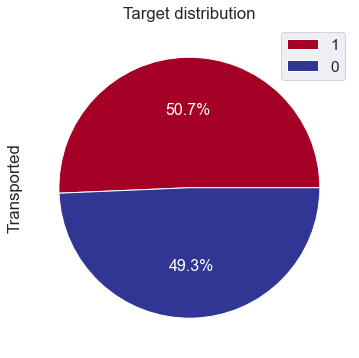

In [18]:
# Figure size
plt.figure(figsize=(6,6))

# Pie plot
df_train['Transported'].value_counts()\
.plot.pie(autopct='%1.1f%%', textprops={'fontsize':16, 'color': 'w'}, legend=True, colormap= 'RdYlBu')\
.set_title("Target distribution")

- La variable objetivo esta bastante balanceada, esto nos ahorra tener que aplicar tecnicas de muestreo para el entrenamiento.

## Transformacion de Variables

### PassengerId

In [15]:
#passengerId = X.PassengerId
#X.drop('PassengerId',axis=1,inplace=True)

### Cabin
Como se sugirio antes vamos a separar las variables "Cabin" en tres "CabinDeck","CabinNo" y "CabinSide"  

In [19]:
df_train[["CabinDeck","CabinNo","CabinSide"]]=df_train["Cabin"].str.split("/",expand=True)
df_train.drop(columns=["Cabin"],inplace=True)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNo,CabinSide
0,3430,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0,C,123,P
1,669,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1,F,126,S
2,8430,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1,B,343,S
3,6463,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0,F,1420,P
4,85,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0,G,9,P


In [20]:
df_test[["CabinDeck","CabinNo","CabinSide"]]=df_test["Cabin"].str.split("/",expand=True)
df_test.drop(columns=["Cabin"],inplace=True)

**Cabin Deck**

Text(0.5, 1.0, 'Distribucion CabinDeck')

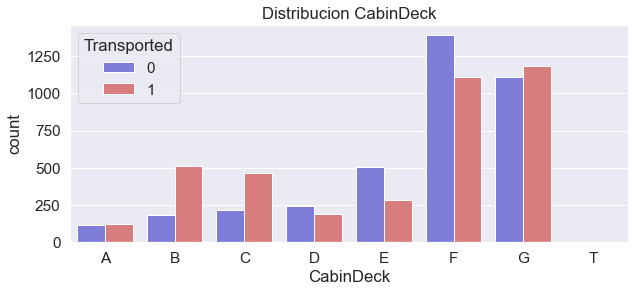

In [22]:
# Plot distribution CabinDeck
fig=plt.figure(figsize=(10,4))
sns.countplot(data=df_train, x='CabinDeck', hue='Transported', order=['A','B','C','D','E','F','G','T'], palette=colors)
plt.title('Distribucion CabinDeck')

- Las cabinas en las plataformas F y G son las que tienen la mayor cantidad de personas. Las cabinas en la plataforma T parecen ser datos atipicos.

**CabinNo**

In [25]:
df_test['CabinNo'] = pd.to_numeric(df_test['CabinNo'])

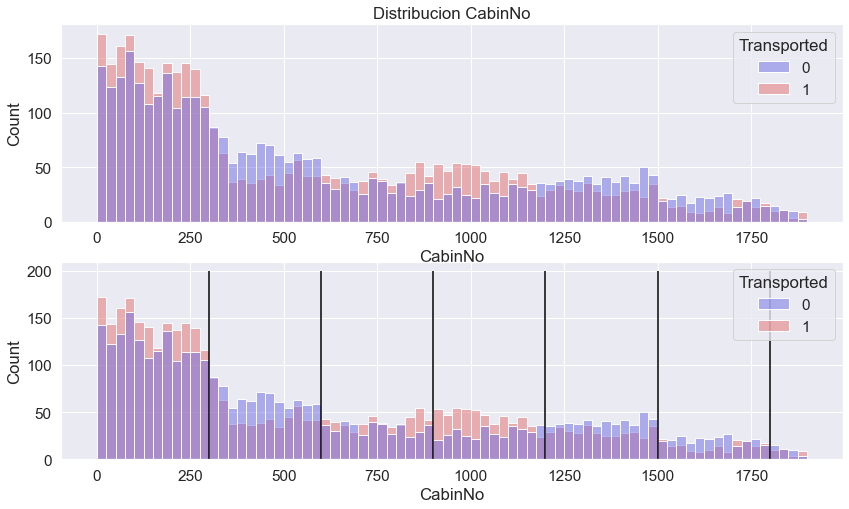

In [26]:
fig=plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
df_train['CabinNo'] = pd.to_numeric(df_train['CabinNo'])
sns.histplot(data=df_train, x='CabinNo', hue='Transported',binwidth=25, palette=colors)
plt.title('Distribucion CabinNo')
plt.subplot(2,1,2)
df_train['CabinNo'] = pd.to_numeric(df_train['CabinNo'])
sns.histplot(data=df_train, x='CabinNo', hue='Transported',binwidth=25, palette=colors)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')

- Las cabinas parecieran estar agrupadas de a 300 si consideramos como se distribuyen las personas Transportadas y no transportadas a lo largo.
- Cada grupo de 300 cabinas parece estar asociada a una plataforma.
- Se considera hacer un One-Hot encoding para cada region de cabinas.

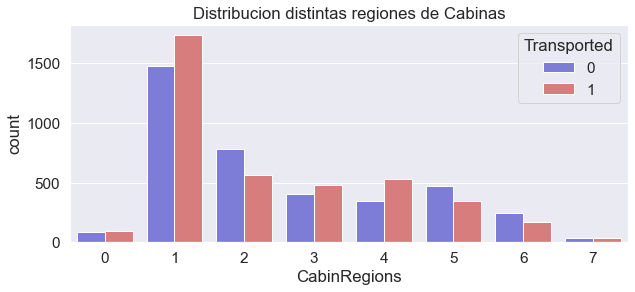

In [29]:
# New features - df_training set
df_train['CabinRegion1']=(df_train['CabinNo']<300).astype(int)   # one-hot encoding
df_train['CabinRegion2']=((df_train['CabinNo']>=300) & (df_train['CabinNo']<600)).astype(int)
df_train['CabinRegion3']=((df_train['CabinNo']>=600) & (df_train['CabinNo']<900)).astype(int)
df_train['CabinRegion4']=((df_train['CabinNo']>=900) & (df_train['CabinNo']<1200)).astype(int)
df_train['CabinRegion5']=((df_train['CabinNo']>=1200) & (df_train['CabinNo']<1500)).astype(int)
df_train['CabinRegion6']=((df_train['CabinNo']>=1500) & (df_train['CabinNo']<1800)).astype(int)
df_train['CabinRegion7']=(df_train['CabinNo']>=1800).astype(int)

# New features - df_test set
df_test['CabinRegion1']=(df_test['CabinNo']<300).astype(int)   # one-hot encoding
df_test['CabinRegion2']=((df_test['CabinNo']>=300) & (df_test['CabinNo']<600)).astype(int)
df_test['CabinRegion3']=((df_test['CabinNo']>=600) & (df_test['CabinNo']<900)).astype(int)
df_test['CabinRegion4']=((df_test['CabinNo']>=900) & (df_test['CabinNo']<1200)).astype(int)
df_test['CabinRegion5']=((df_test['CabinNo']>=1200) & (df_test['CabinNo']<1500)).astype(int)
df_test['CabinRegion6']=((df_test['CabinNo']>=1500) & (df_test['CabinNo']<1800)).astype(int)
df_test['CabinRegion7']=(df_test['CabinNo']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
df_train['CabinRegions']=(df_train['CabinRegion1']+2*df_train['CabinRegion2']+3*df_train['CabinRegion3']+4*df_train['CabinRegion4']+5*df_train['CabinRegion5']+6*df_train['CabinRegion6']+7*df_train['CabinRegion7']).astype(int)
sns.countplot(data=df_train, x='CabinRegions', hue='Transported', palette=colors)
plt.title('Distribucion distintas regiones de Cabinas')
df_train.drop('CabinRegions', axis=1, inplace=True)

- La Region cero representa los valores nulos de la variable Cabin.
- Se observa que las personas en las cabinas 1, 3 y 4 tienen mas chances de ser transportadas.
- Las personas en las cabinas 2,5 y 6 tienen menos chances de ser transportadas.
- Las personas en la cabina 7 tienen las mimas posibilidades de ser transportadas como no.

In [36]:
df_train.nunique()

PassengerId     7823
HomePlanet         3
CryoSleep          2
Destination        3
Age               80
VIP                2
RoomService     1195
FoodCourt       1400
ShoppingMall    1045
Spa             1238
VRDeck          1229
Name            7623
Transported        2
CabinDeck          8
CabinNo         1772
CabinSide          2
CabinRegion1       2
CabinRegion2       2
CabinRegion3       2
CabinRegion4       2
CabinRegion5       2
CabinRegion6       2
CabinRegion7       2
Expenditure     2169
No_spending        2
dtype: int64

In [38]:
df_test.nunique()

PassengerId     870
HomePlanet        3
CryoSleep         2
Destination       3
Age              73
VIP               2
RoomService     238
FoodCourt       260
ShoppingMall    214
Spa             260
VRDeck          229
Name            854
CabinDeck         8
CabinNo         625
CabinSide         2
CabinRegion1      2
CabinRegion2      2
CabinRegion3      2
CabinRegion4      2
CabinRegion5      2
CabinRegion6      2
CabinRegion7      2
Expenditure     435
No_spending       2
dtype: int64

- Despues de estas transformaciones se observa un gran decaimiento de las variables categoricas, permitiendo realizar encodings sin aumentar considerablemente la cantidad de variables del dataset.

**Cabin Side**

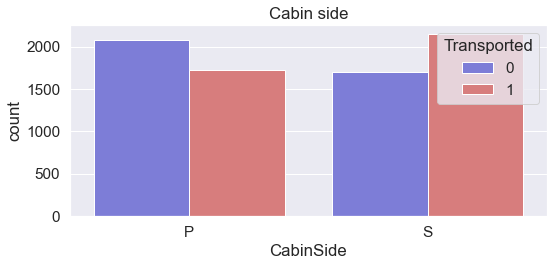

In [22]:
fig=plt.figure(figsize=(8,4))
sns.countplot(data=df_train, x='CabinSide', hue='Transported',  palette=colors)
plt.title('Cabin side')
fig.tight_layout()

- Las personas que estan en la zona del Babor (P) de la embarcacion, tienen menos chances de ser transportadas.
- Las personas que estan del lado del estribor(S), tienen mas posibilidades de ser transportadas a otra dimension.

### Expenditure

Creamos la variable Expenditure que representa los gastos totales que realizaron las personas durante el viaje.

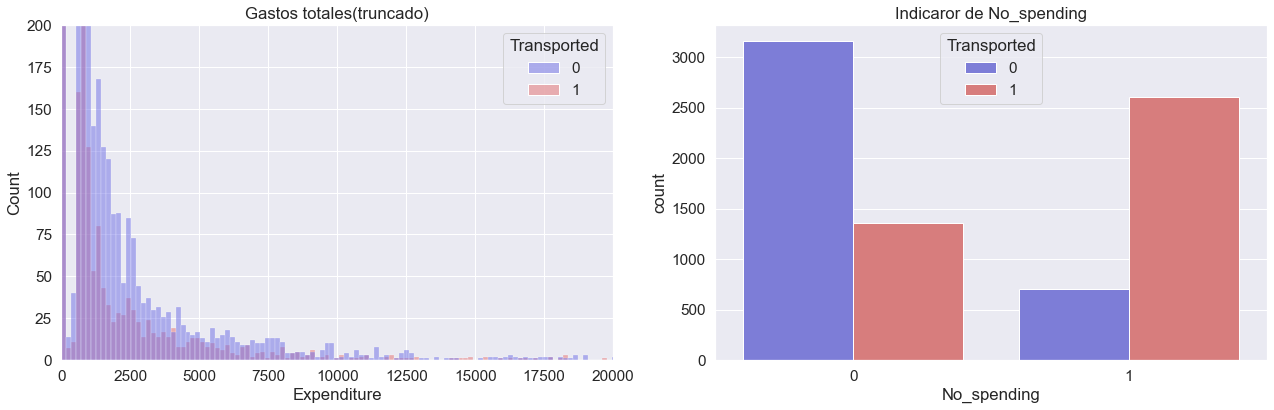

In [32]:
# New features - df_training set
df_train['Expenditure']=df_train[exp_feats].sum(axis=1)
df_train['No_spending']=(df_train['Expenditure']==0).astype(int)

# New features - df_test set
df_test['Expenditure']=df_test[exp_feats].sum(axis=1)
df_test['No_spending']=(df_test['Expenditure']==0).astype(int)

# Plot distribution of new features
fig=plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x='Expenditure', hue='Transported', bins=200, palette=colors)
plt.title('Gastos totales(truncado)')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=df_train, x='No_spending', hue='Transported',  palette=colors)
plt.title('Indicaror de No_spending')
fig.tight_layout()

- Es mayor la proporcion de personas transportadas en las que menos gastan con respecto a las que gastaron mucho.
- Tienen muchas mas chances de ser transportadas las personas que no realizaron ningun gasto.

Para evitar eliminar outliers, analizamos si podemos comprimir los valores de gasto mediante una transformacion logaritmica.

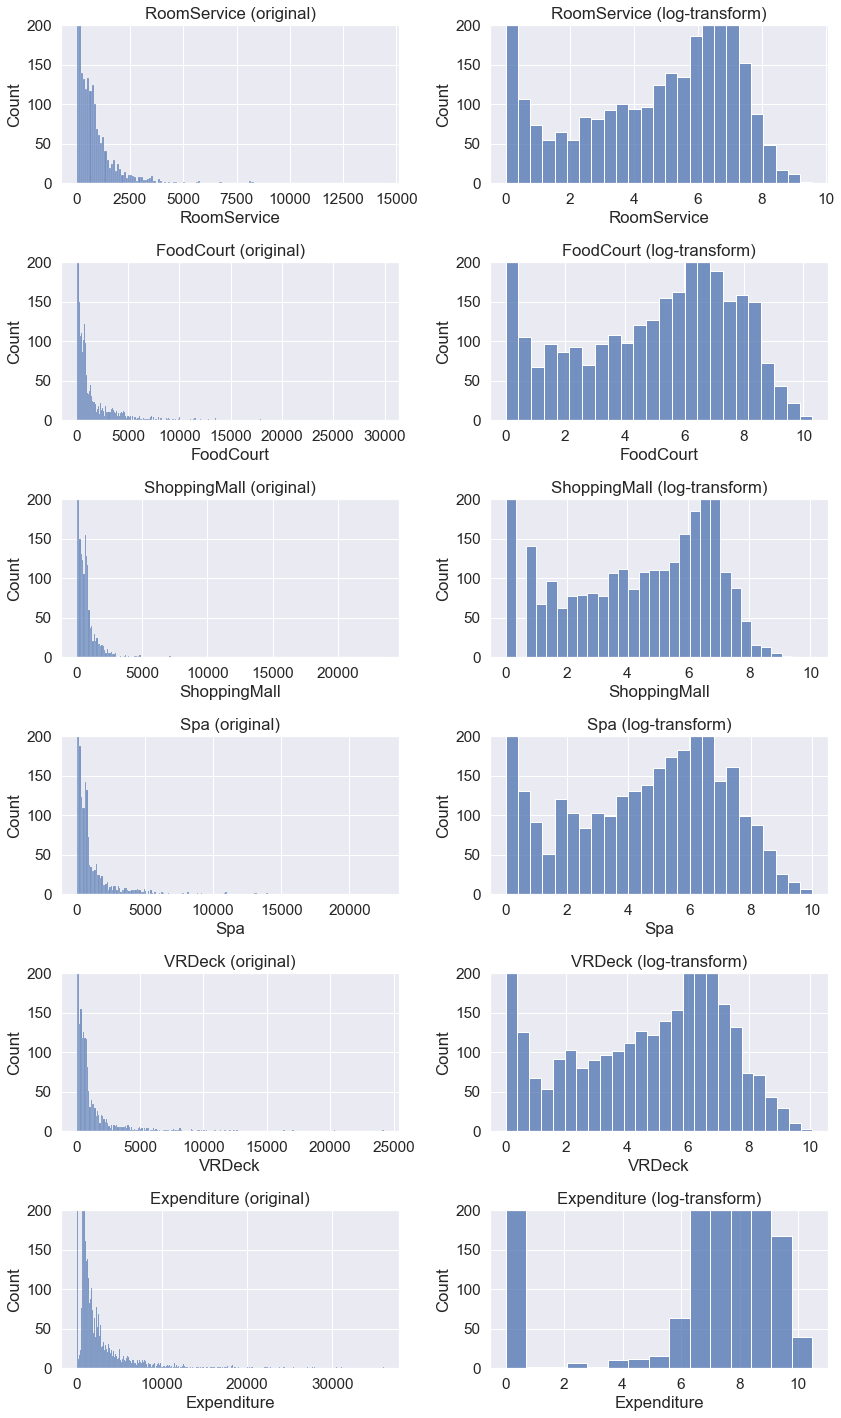

In [24]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(df_train[col], binwidth=100, palette=colors)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+df_train[col]), palette=colors)
    plt.title(f'{col} (log-transform)')
    plt.ylim([0,200])
    
fig.tight_layout()
plt.show()

- Puede ser muy valioso realizar una transformacion logaritimica de las variables de costos a los fines de no perder datos. Se llevara a cabo esta transformacion despues de imputar los datos faltantes

### Valores Faltantes

Anlizamos los datos faltantes de cada set.

**Entrenamiento**

<AxesSubplot:>

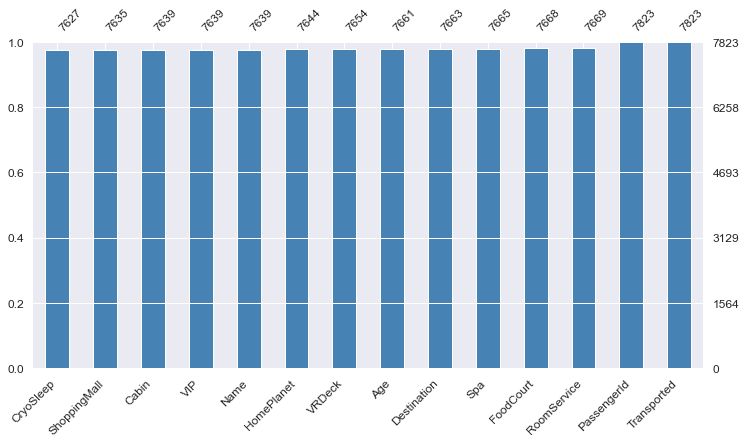

In [13]:
import missingno as msno
msno.bar(df_train,figsize=(12, 6), sort="ascending",fontsize=12, color='steelblue') 

<AxesSubplot:>

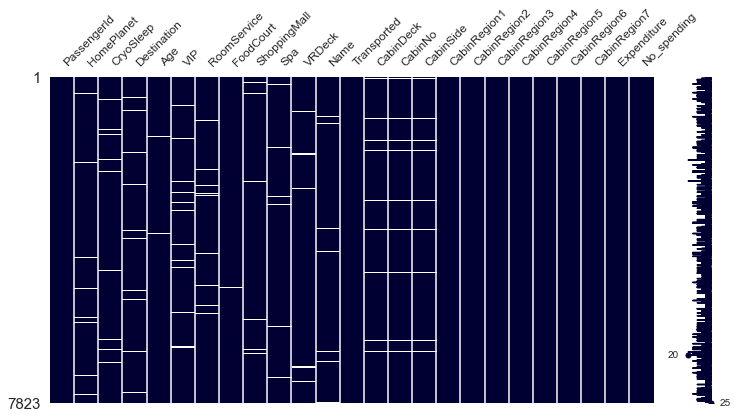

In [26]:
msno.matrix(df_train,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

**Test**

<AxesSubplot:>

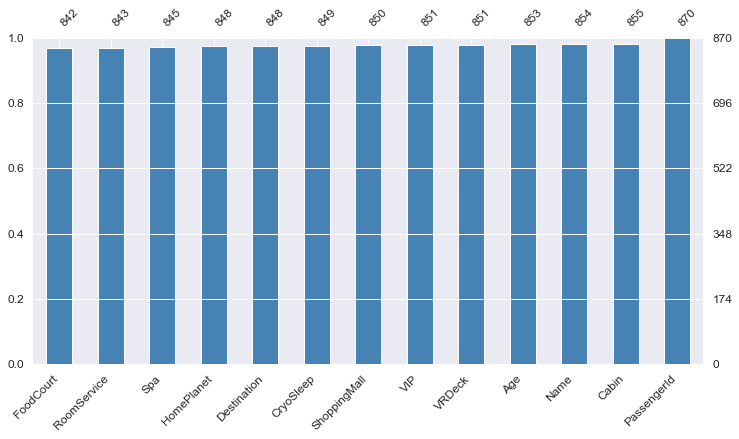

In [14]:
msno.bar(df_test,figsize=(12, 6), sort="ascending",fontsize=12, color='steelblue') 

<AxesSubplot:>

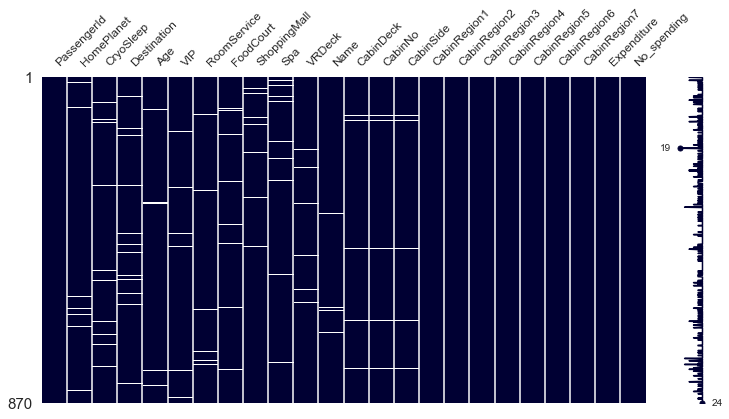

In [28]:
msno.matrix(df_test,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

**Imputacion**

Procedemos a realizar imputaciones simples, pero antes de eso vamos a tener una consideracion.

**Expenditure y CryoSleep**

No podemos considerar que una persona que este en sueño criogenico pueda realizar gastos, por lo tanto usamos la variable CryoSleep para imputar la variable Expenditure en ambos sets.

In [35]:
ExpBefore=df_train[exp_feats].isna().sum().sum()

# CryoSleep has no expenditure
for col in exp_feats:
    df_train.loc[(df_train[col].isna()) & (df_train['CryoSleep']==True), col]=0

# Print number of missing values left
print('Valores faltantes antes de la imputacion:',ExpBefore)
print('Valores faltantes despues de la imputacion:',df_train[exp_feats].isna().sum().sum())

# Update expenditure and no_spending
df_train['Expenditure']=df_train[exp_feats].sum(axis=1)
df_train['No_spending']=(df_train['Expenditure']==0).astype(int)


Valores faltantes antes de la imputacion: 824
Valores faltantes despues de la imputacion: 507


In [34]:
ExpBefore=df_test[exp_feats].isna().sum().sum()

# CryoSleep has no expenditure
for col in exp_feats:
    df_test.loc[(df_test[col].isna()) & (df_test['CryoSleep']==True), col]=0

# Print number of missing values left
print('Valores faltantes antes de la imputacion:',ExpBefore)
print('Valores faltantes despues de la imputacion:',df_test[exp_feats].isna().sum().sum())

# Update expenditure and no_spending
df_test['Expenditure']=df_test[exp_feats].sum(axis=1)
df_test['No_spending']=(df_test['Expenditure']==0).astype(int)

Valores faltantes antes de la imputacion: 119
Valores faltantes despues de la imputacion: 75


**Imputacion Simple**

Las variables categorias van a imputarse por la moda mientras que las variables numericas se imputaran por la mediana.

In [40]:
#Tuve problemas con el fit al final no los use
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

cols = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination',
        'Age', 'VIP','RoomService', 'FoodCourt', 'ShoppingMall',
        'Spa', 'VRDeck', 'Name','CabinDeck', 'CabinNo', 'CabinSide',
        'CabinRegion1','CabinRegion2', 'CabinRegion3', 'CabinRegion4',
        'CabinRegion5','CabinRegion6', 'CabinRegion7', 'Expenditure', 'No_spending']

for col in cols:
    if col in ['Age', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Expenditure']:
        df_train[col].fillna(df_train[col].median(), inplace=True)
        df_test[col].fillna(df_train[col].median(), inplace=True)
    else:
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
        df_test[col].fillna(df_train[col].mode()[0], inplace=True)

Actualizo cabin regions en ambos datasets.

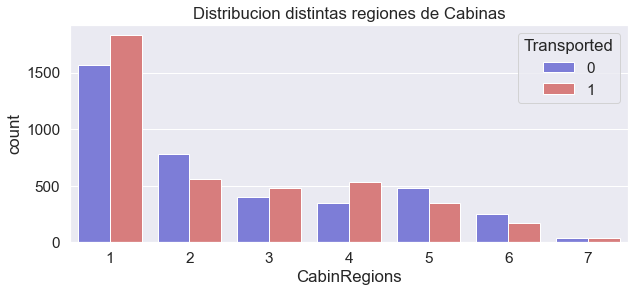

In [41]:
# New features - df_training set
df_train['CabinRegion1']=(df_train['CabinNo']<300).astype(int)   # one-hot encoding
df_train['CabinRegion2']=((df_train['CabinNo']>=300) & (df_train['CabinNo']<600)).astype(int)
df_train['CabinRegion3']=((df_train['CabinNo']>=600) & (df_train['CabinNo']<900)).astype(int)
df_train['CabinRegion4']=((df_train['CabinNo']>=900) & (df_train['CabinNo']<1200)).astype(int)
df_train['CabinRegion5']=((df_train['CabinNo']>=1200) & (df_train['CabinNo']<1500)).astype(int)
df_train['CabinRegion6']=((df_train['CabinNo']>=1500) & (df_train['CabinNo']<1800)).astype(int)
df_train['CabinRegion7']=(df_train['CabinNo']>=1800).astype(int)

# New features - df_test set
df_test['CabinRegion1']=(df_test['CabinNo']<300).astype(int)   # one-hot encoding
df_test['CabinRegion2']=((df_test['CabinNo']>=300) & (df_test['CabinNo']<600)).astype(int)
df_test['CabinRegion3']=((df_test['CabinNo']>=600) & (df_test['CabinNo']<900)).astype(int)
df_test['CabinRegion4']=((df_test['CabinNo']>=900) & (df_test['CabinNo']<1200)).astype(int)
df_test['CabinRegion5']=((df_test['CabinNo']>=1200) & (df_test['CabinNo']<1500)).astype(int)
df_test['CabinRegion6']=((df_test['CabinNo']>=1500) & (df_test['CabinNo']<1800)).astype(int)
df_test['CabinRegion7']=(df_test['CabinNo']>=1800).astype(int)

# Plot distribution of new features
plt.figure(figsize=(10,4))
df_train['CabinRegions']=(df_train['CabinRegion1']+2*df_train['CabinRegion2']+3*df_train['CabinRegion3']+4*df_train['CabinRegion4']+5*df_train['CabinRegion5']+6*df_train['CabinRegion6']+7*df_train['CabinRegion7']).astype(int)
sns.countplot(data=df_train, x='CabinRegions', hue='Transported', palette=colors)
plt.title('Distribucion distintas regiones de Cabinas')
df_train.drop('CabinRegions', axis=1, inplace=True)

Vuelvo a analizar ambos sets.

<AxesSubplot:>

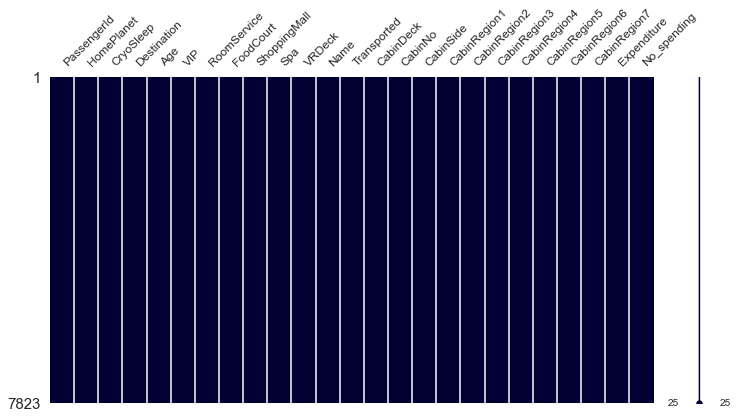

In [42]:
msno.matrix(df_train,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

In [43]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
CabinDeck       0
CabinNo         0
CabinSide       0
CabinRegion1    0
CabinRegion2    0
CabinRegion3    0
CabinRegion4    0
CabinRegion5    0
CabinRegion6    0
CabinRegion7    0
Expenditure     0
No_spending     0
dtype: int64

<AxesSubplot:>

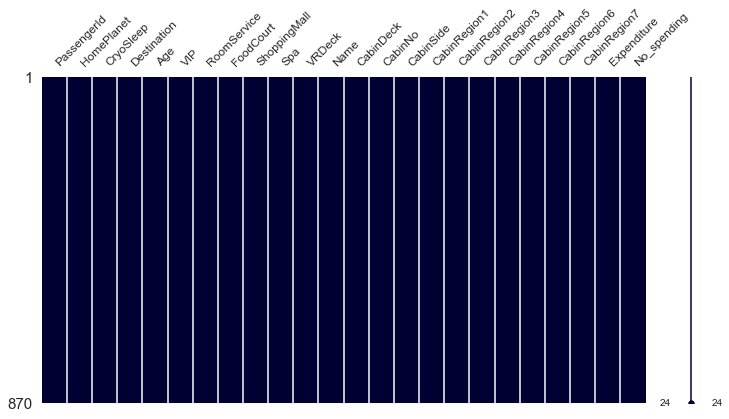

In [44]:
msno.matrix(df_test,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

In [35]:
df_test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
CabinDeck       0
CabinNo         0
CabinSide       0
CabinRegion1    0
CabinRegion2    0
CabinRegion3    0
CabinRegion4    0
CabinRegion5    0
CabinRegion6    0
CabinRegion7    0
Expenditure     0
No_spending     0
dtype: int64

Se imputaron los valores faltantes

### Dropeo variables irrelevantes

Busco correlaciones que se puedan haber obviado.

In [91]:
corr_matrix_train = df_train.corr()
s = corr_matrix_train.unstack()
best_correlations = s[s >= 0.6].reset_index().sort_values(["level_0", 0], ascending=[True, False])
best_correlations

,level_0,level_1,0
4,Age,Age,1.000000
14,CabinNo,CabinNo,1.000000
13,CabinNo,PassengerId,0.663928
15,CabinRegion1,CabinRegion1,1.000000
16,CabinRegion2,CabinRegion2,1.000000
17,CabinRegion3,CabinRegion3,1.000000
18,CabinRegion4,CabinRegion4,1.000000
19,CabinRegion5,CabinRegion5,1.000000
20,CabinRegion6,CabinRegion6,1.000000
21,CabinRegion7,CabinRegion7,1.000000


Se observa que las variables que mas correlacionan entre si son:
- CryoSleep - No_spending - Tiene sentido ya qe se uso una para imputar a la otra por la relacion que tienen en el dominio del problema
- PassengerID - CabinNo - Puede ser que el ID este asociado al numero de cabina. Dado que este ultimo fue discretizado ambas variables se pueden considerar como irrelevantes

In [93]:
corr_matrix_train["Transported"].sort_values(ascending=False)

Transported     1.000000
No_spending     0.481270
CryoSleep       0.463794
CabinRegion4    0.071814
CabinRegion1    0.055810
FoodCourt       0.047125
CabinRegion3    0.028320
PassengerId     0.022143
ShoppingMall    0.003636
CabinRegion7   -0.007951
VIP            -0.043522
CabinNo        -0.044358
CabinRegion6   -0.046914
CabinRegion5   -0.057028
Age            -0.072253
CabinRegion2   -0.080636
Expenditure    -0.199703
VRDeck         -0.207718
Spa            -0.213783
RoomService    -0.243020
Name: Transported, dtype: float64

- Se observa que la variable VIP que se penso previamente en dropear es una variable poco signifcativa.

Hacemos copias antes del drop, y eliminamos las variables anteriormente mencionadas de los dataset que entrenaran el modelo junto con las variables de identificacion como PassengerId y Name a los fines de disminuir el overffiting.

In [114]:
X = df_train.copy()
y = X.Transported
X_test = df_test.copy()

In [115]:
X.drop(['Transported', 'CabinNo', 'VIP', 'PassengerId', 'Name'], axis=1, inplace=True)

In [116]:
X_test.drop(['CabinNo', 'VIP', 'PassengerId', 'Name'], axis=1, inplace=True)

### Transformacion Logaritmica

Llevamos a cabo la transformacion logaritmica.

In [117]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

### Encoding y Normalizacion

Normalizamos variables numericas y codificamos variables categoricas.

In [118]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Indentify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore',sparse=False))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)

Training set shape: (7823, 31)


## Modelado

Dividimos el conjunto de entrenamiento en entrenamiento y validacion (80% entrenamiento y 20% validacion)

In [125]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state = 123)

### Planteo modelos
Entrenamos modelos simples sin ajustar hiperparametros y medimos su accuracy.

In [126]:
clfs = [GaussianNB(),
        LogisticRegression(random_state=123),
        SGDClassifier(random_state=123),
        DecisionTreeClassifier(random_state=123),
        SVC(random_state=123),
        RandomForestClassifier(random_state=123),
        AdaBoostClassifier(random_state=123), 
        ExtraTreesClassifier(random_state=123)]

names = ['Clasificador Naive Bayes',
         'Clasificador por Regresion Logistica',
         'Clasificador por Decenso de Gradiente',
         'Árbol de decisión',
         'Clasificador por Support Vector Machine',
         'Clasificador por Random Forest',
         'Clasificador AdaBoost',
         'Clasificador ExtraTrees']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_validation)
    accuracy = accuracy_score(y_validation, train_predictions)
    print(f"Accuracy test {name}: %.2f%%\n" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Clasificador Naive Bayes
Accuracy train Clasificador Naive Bayes: 69.34%
Accuracy test Clasificador Naive Bayes: 69.39%

Clasificador por Regresion Logistica
Accuracy train Clasificador por Regresion Logistica: 78.17%
Accuracy test Clasificador por Regresion Logistica: 76.55%

Clasificador por Decenso de Gradiente


C:\Users\teoas\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy train Clasificador por Decenso de Gradiente: 76.56%
Accuracy test Clasificador por Decenso de Gradiente: 75.78%

Árbol de decisión
Accuracy train Árbol de decisión: 97.75%
Accuracy test Árbol de decisión: 75.08%

Clasificador por Support Vector Machine
Accuracy train Clasificador por Support Vector Machine: 82.31%
Accuracy test Clasificador por Support Vector Machine: 79.94%

Clasificador por Random Forest
Accuracy train Clasificador por Random Forest: 97.75%
Accuracy test Clasificador por Random Forest: 79.62%

Clasificador AdaBoost
Accuracy train Clasificador AdaBoost: 79.91%
Accuracy test Clasificador AdaBoost: 78.53%

Clasificador ExtraTrees
Accuracy train Clasificador ExtraTrees: 97.75%
Accuracy test Clasificador ExtraTrees: 77.83%



### Ajuste Hiperparametros Tres mejores

**SVC**

In [102]:
grid_SVC = GridSearchCV(SVC(random_state=123),
 {   'C':range(1, 101, 5),
     'kernel':['linear', 'poly','rbf'],
     'class_weight':['balanced', None]})

grid_SVC.fit(x_train,y_train)
grid_SVC.best_params_

results_df = pd.DataFrame(grid_SVC.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
6_None_rbf,"{'C': 6, 'class_weight': None, 'kernel': 'rbf'}",1,0.811759,0.007544
6_balanced_rbf,"{'C': 6, 'class_weight': 'balanced', 'kernel':...",2,0.810960,0.007949
1_balanced_rbf,"{'C': 1, 'class_weight': 'balanced', 'kernel':...",3,0.808086,0.007889
11_None_rbf,"{'C': 11, 'class_weight': None, 'kernel': 'rbf'}",4,0.807444,0.008841
1_None_poly,"{'C': 1, 'class_weight': None, 'kernel': 'poly'}",5,0.807126,0.007173
...,...,...,...,...
91_balanced_rbf,"{'C': 91, 'class_weight': 'balanced', 'kernel'...",116,0.775805,0.009585
86_balanced_rbf,"{'C': 86, 'class_weight': 'balanced', 'kernel'...",117,0.775804,0.010433
96_balanced_poly,"{'C': 96, 'class_weight': 'balanced', 'kernel'...",118,0.775485,0.006401


Accuracy train SVC: 85.65%
Accuracy SVC: 79.11%


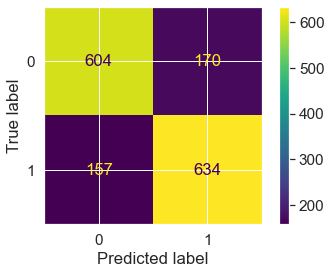

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       774
           1       0.79      0.80      0.79       791

    accuracy                           0.79      1565
   macro avg       0.79      0.79      0.79      1565
weighted avg       0.79      0.79      0.79      1565



In [127]:
# parameters_svc = {
#     'C': 6,
#     'kernel':'rbf',
#     'class_weight': None
# }

clf = SVC(C=6, kernel='rbf', class_weight=None, random_state = 123).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train SVC: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_validation)
accuracy = accuracy_score(y_validation, test_predictions)
print("Accuracy SVC: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_validation, test_predictions)
plt.show()

print(classification_report(y_validation,clf.predict(x_validation)))

**Random Forest Classifier** 

In [122]:
grid_RFC = GridSearchCV(RandomForestClassifier(random_state=123),
 {'n_estimators' : range(50,500,50), 
  'criterion':('gini','entropy'),
  'max_depth':range(10,100,10)})

grid_RFC.fit(x_train,y_train)
grid_RFC.best_params_

results_df = pd.DataFrame(grid_RFC.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

KeyboardInterrupt: 

Accuracy RFC: 86.66%
Accuracy RFC: 80.00%


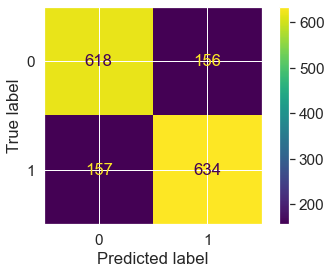

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       774
           1       0.80      0.80      0.80       791

    accuracy                           0.80      1565
   macro avg       0.80      0.80      0.80      1565
weighted avg       0.80      0.80      0.80      1565



In [128]:
# parameters_RFC= {
#     'n_estimators': 250,
#     'criterion':'entropy',
#     'max_depth': 10
# }

clf = RandomForestClassifier(n_estimators=250,criterion='entropy', max_depth=10, random_state = 123).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy RFC: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_validation)
accuracy = accuracy_score(y_validation, test_predictions)
print("Accuracy RFC: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_validation, test_predictions)
plt.show()

print(classification_report(y_validation,clf.predict(x_validation)))

**AdaBoost** 

In [106]:
grid_AdaBoost = GridSearchCV(AdaBoostClassifier(random_state=123),
 {    'learning_rate': [0.1, 0.09 ,0.08, 0.05, 0.025, 0.01],
      'n_estimators': range(60, 220, 20)})

grid_AdaBoost.fit(x_train,y_train)
grid_AdaBoost.best_params_

results_df = pd.DataFrame(grid_AdaBoost.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
0.09_200,"{'learning_rate': 0.09, 'n_estimators': 200}",1,0.791467,0.006619
0.1_200,"{'learning_rate': 0.1, 'n_estimators': 200}",2,0.791307,0.004792
0.1_180,"{'learning_rate': 0.1, 'n_estimators': 180}",3,0.790349,0.005854
0.09_180,"{'learning_rate': 0.09, 'n_estimators': 180}",4,0.789709,0.005131
0.08_200,"{'learning_rate': 0.08, 'n_estimators': 200}",5,0.789230,0.006230
0.1_160,"{'learning_rate': 0.1, 'n_estimators': 160}",6,0.788271,0.006135
0.08_180,"{'learning_rate': 0.08, 'n_estimators': 180}",7,0.786514,0.006348
0.09_160,"{'learning_rate': 0.09, 'n_estimators': 160}",8,0.784756,0.006274
0.1_140,"{'learning_rate': 0.1, 'n_estimators': 140}",9,0.783637,0.006031


Accuracy train Arbol de decisión: 81.02%
Accuracy test Arbol de decisión: 78.72%


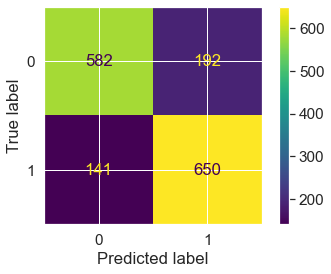

              precision    recall  f1-score   support

           0       0.80      0.75      0.78       774
           1       0.77      0.82      0.80       791

    accuracy                           0.79      1565
   macro avg       0.79      0.79      0.79      1565
weighted avg       0.79      0.79      0.79      1565



In [129]:
# parameters_AdaBoost = {
#     'learning_rate': 0.09,
#     'n_estimators':'200',
# }

clf = AdaBoostClassifier(learning_rate=0.9, n_estimators=200, random_state = 123).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_validation)
accuracy = accuracy_score(y_validation, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_validation, test_predictions)
plt.show()

print(classification_report(y_validation,clf.predict(x_validation)))

In [133]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=123)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([SVC(C=6, kernel='rbf', class_weight=None, random_state = 123),
                       RandomForestClassifier(n_estimators=250,criterion='entropy', max_depth=10, random_state = 123),
                       AdaBoostClassifier(learning_rate=0.9, n_estimators=200, random_state = 123)
                      ],names):
    print()
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')


SVC(C=6, random_state=123)
Precisión test fold 0: 80.99
Precisión test fold 1: 79.95
Precisión test fold 2: 83.39
Precisión test fold 3: 80.66
Precisión test fold 4: 80.18
Avg. accuracy = 81.03208168289649

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=250,
                       random_state=123)
Precisión test fold 0: 80.19
Precisión test fold 1: 80.03
Precisión test fold 2: 81.95
Precisión test fold 3: 78.90
Precisión test fold 4: 80.90
Avg. accuracy = 80.39293804572955

AdaBoostClassifier(learning_rate=0.9, n_estimators=200, random_state=123)
Precisión test fold 0: 78.67
Precisión test fold 1: 80.51
Precisión test fold 2: 81.31
Precisión test fold 3: 78.18
Precisión test fold 4: 80.58
Avg. accuracy = 79.84964105393001


### Ensemble

Se hace un ensemble con los tres modelos para mejorar aun mas el score obtenido.

In [135]:
from sklearn.ensemble import VotingClassifier

svm_clf = SVC(C=6, kernel='rbf', class_weight=None, random_state = 123 )#,probability=True)
rnd_clf = RandomForestClassifier(n_estimators=250,criterion='entropy', max_depth=10, random_state = 123)
ada_clf = AdaBoostClassifier(learning_rate=0.9, n_estimators=200, random_state = 123)
voting_clf = VotingClassifier(
        estimators=[('rf', rnd_clf), ('svc', svm_clf), ('ada', ada_clf)],
        voting='hard'
)
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_validation)
print('Voting Classifier accuracy = ', accuracy_score(y_validation,y_pred))

Voting Classifier accuracy =  0.7993610223642172


In [137]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=123)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


clf_final = VotingClassifier(estimators=[('rf', rnd_clf), ('svc', svm_clf), ('ada', ada_clf)],voting='hard')
avg_accuracy = 0
for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
    xi, yi = x_train2[train_idx], y_train2[train_idx]
    x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
    clf_final = clf_final.fit(xi, yi)

    test_predictions = clf_final.predict(x_valid)
    accuracy = accuracy_score(y_valid, test_predictions)
    avg_accuracy +=accuracy
    print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

avg_accuracy /= FOLDS
print(f'Avg. accuracy = {avg_accuracy * 100}')

Precisión test fold 0: 80.43
Precisión test fold 1: 80.99
Precisión test fold 2: 82.83
Precisión test fold 3: 80.26
Precisión test fold 4: 81.77
Avg. accuracy = 81.25591539547914


## Submission

In [138]:
test_df = pd.read_csv('test.csv')

In [139]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


Generamos la salida

**Submission 1** - Ensemble RandomForestClassifier, AdaBoostClassifier y SVC por Hard Voting  #Submission Score : 0.79770

In [140]:
test_id = df_test.PassengerId
test_pred = clf.predict(X_test)


In [141]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

**Submission 2** - SVC mejor score modelo ajustado  #Submission Score : 0.80299   

In [142]:
svm_clf.fit(x_train, y_train)
test_id_svm = df_test.PassengerId
test_pred_svm = svm_clf.predict(X_test)

In [143]:
submission = pd.DataFrame(list(zip(test_id_svm, test_pred_svm)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission_svm.csv", header=True, index=False)

**Submission 3** - RandomForestClassifier Segundo mejor score modelo ajustado #Submission Score : 0.80000 

In [146]:
rnd_clf.fit(x_train, y_train)
test_id_rnd = df_test.PassengerId
test_pred_rnd = rnd_clf.predict(X_test)

In [147]:
submission = pd.DataFrame(list(zip(test_id_rnd, test_pred_rnd)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission_rnd.csv", header=True, index=False)